# Data Visualisation

Visualise signals in a MIMIC Waveform record.

---
## Specify an ICU stay and segment

<div class="alert alert-block alert-warning"> <b>Resource:</b> These steps are taken from the <a href="https://wfdb.io/mimic_wfdb_tutorials/tutorial/notebooks/data-extraction.html">Data Extraction</a> tutorial. </div>

- Specify the required Python packages

In [1]:
import sys
import wfdb

- Get a list of ICU stays in the database

In [2]:
database_name = 'mimic3wdb/1.0' # The name of the MIMIC III Waveform Database on Physionet (see URL: https://physionet.org/content/mimic3wdb/1.0/)
icustay_records = wfdb.get_record_list(database_name)
print("There are {} ICU stays in the database".format(len(icustay_records)))

There are 67830 ICU stays in the database


- Specify an ICU stay

In [3]:
icustay_no = 0 # specify the first record (noting that in Python the first index is 0)
icustay_record = icustay_records[icustay_no]
icustay_record_dir = database_name + '/' + icustay_record
icustay_record_name = icustay_record.split("/")[1]
print("Specified ICU stay: {}".format(icustay_record_name))

Specified ICU stay: 3000003


- Specify a segment of this ICU stay

In [4]:
icustay_files = wfdb.get_record_list(icustay_record_dir)
icustay_segments = [s for s in icustay_files if "_" in s]
icustay_segment_no = 7;
icustay_segment_name = icustay_segments[icustay_segment_no]
print("Specified segment: '{}' within ICU stay '{}'".format(icustay_segment_name, icustay_record_name))

Specified segment: '3000003_0008' within ICU stay '3000003'


---
## Extract data for this segment
- Specify the timings of the data to be extracted

In [5]:
start_seconds = 20 # time since the start of the segment at which to begin extracting data
no_seconds_to_load = 5

- Find out the sampling frequency of the waveform data

In [6]:
segment_metadata = wfdb.rdheader(record_name=icustay_segment_name, pn_dir=icustay_record_dir)
fs = segment_metadata.fs

- Extract the specified data

In [7]:
sampfrom = fs*start_seconds
sampto = fs*(start_seconds+no_seconds_to_load)
segment_data = wfdb.rdrecord(record_name=icustay_segment_name, sampfrom=sampfrom, sampto=sampto, pn_dir=icustay_record_dir) 
print("{} seconds of data extracted from: {}".format(no_seconds_to_load, icustay_segment_name))

5 seconds of data extracted from: 3000003_0008


---
## Plot signals in this segment
Plot the signals contained in this segment

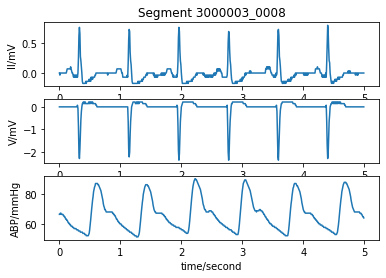

In [8]:
title_text = "Segment " + icustay_segment_name
wfdb.plot_wfdb(record=segment_data, title=title_text, time_units='seconds') 

---
## Assess the suitability of this segment

- Say that the segment must contain ECG (lead II) and PPG signals:

In [162]:
print("Signals in segment: {}".format(segment_data.sig_name))
segment_contains_signals_log = 'II' in segment_data.sig_name and 'PLETH' in segment_data.sig_name
if segment_contains_signals_log:
    print('This segment contains the required signals')
else:
    print('This segment doesn\'t contain the required signals')

Signals in segment: ['II', 'V', 'ABP']
This segment doesn't contain the required signals


<div class="alert alert-block alert-info"> <b>Q:</b> Can you find a segment that does contain the required signals? <br> <b>Hint:</b> Above, try 'icustay_no' = 10, and 'icustay_segment_no' = 7 </div>

Depending on the requirements of a study, only a minority of ICU stays and segments might contain the required signals.